In [127]:
%matplotlib inline
# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%config InlineBackend.figure_format = 'retina'

In [128]:
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [118]:
top_10 = df.groupby('name')['ext price','quantity'].agg({'ext price':'sum','quantity':'count'})\
.sort_values('ext price', ascending = False)[:10].reset_index()

In [119]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [120]:
plt.style.use('ggplot')

In [121]:
top_10

,name,ext price,quantity
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81
5,Barton LLC,109438.50,82
6,Will LLC,104437.60,74
7,Koepp Ltd,103660.54,82
8,"Frami, Hills and Schmidt",103569.59,72
9,Keeling LLC,100934.30,74


In [122]:
top_10.columns

Index(['name', 'ext price', 'quantity'], dtype='object')

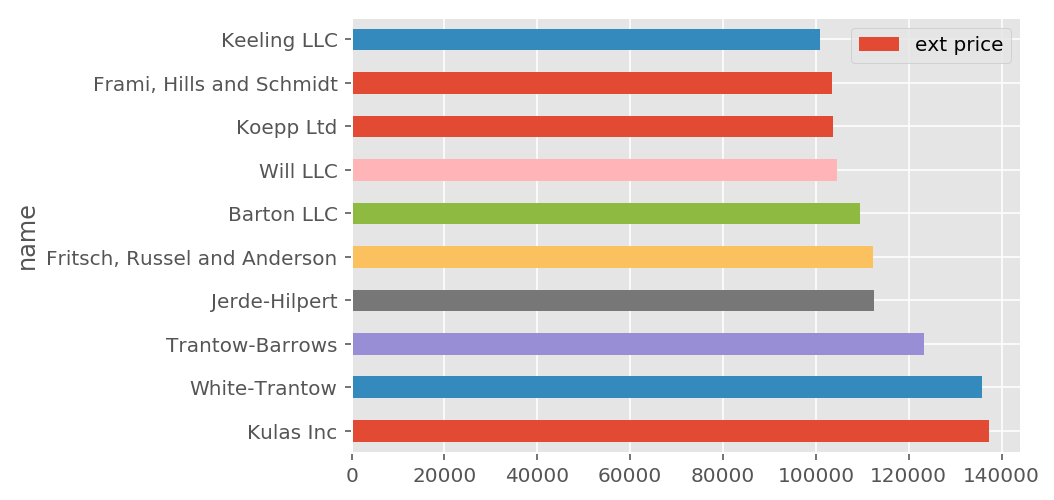

In [129]:
top_10.plot(kind='barh',x='name',y='ext price')

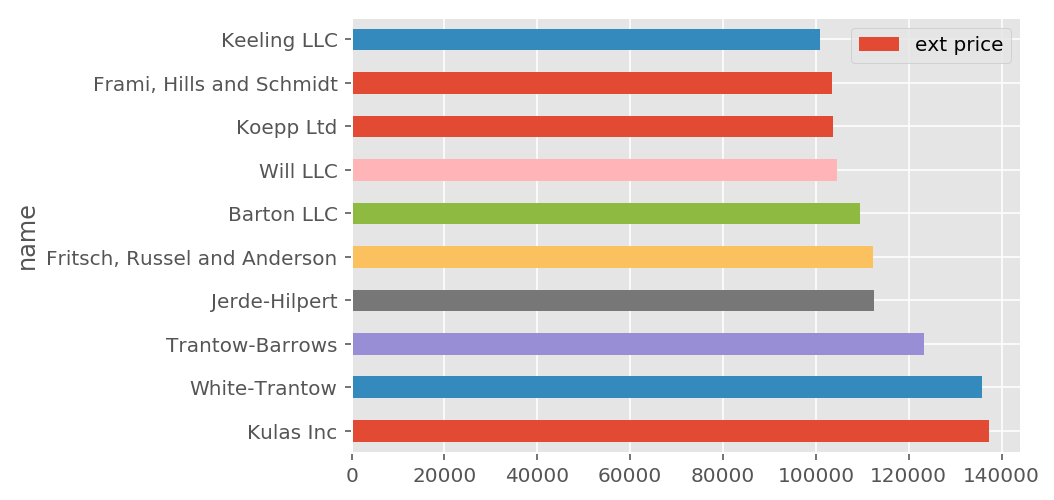

In [130]:
fig,ax=plt.subplots()
top_10.plot(kind='barh',x='name',y='ext price',ax=ax)

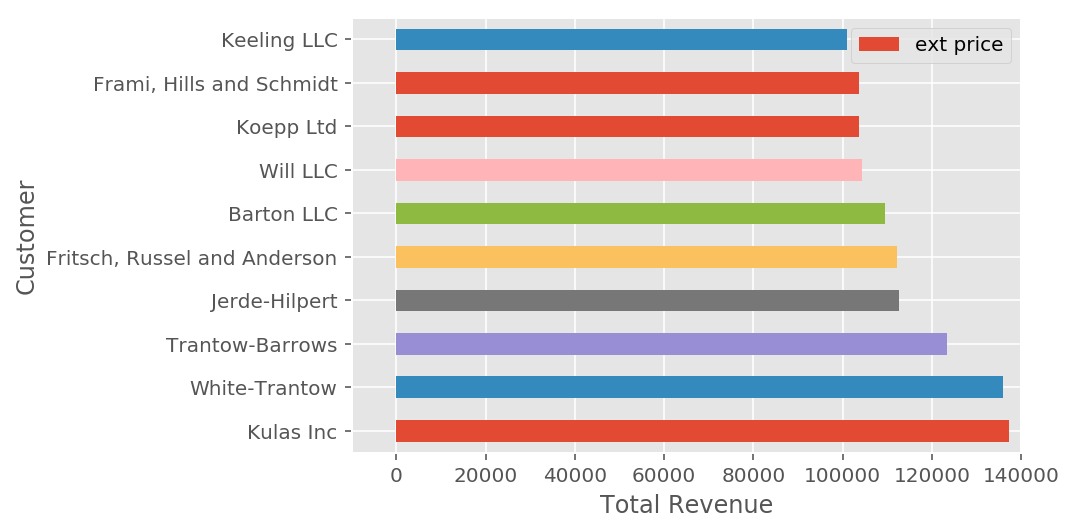

In [131]:
fig,ax=plt.subplots()
top_10.plot(kind='barh',x='name',y='ext price',ax=ax)
ax.set_xlim([-10000, 140000])
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Customer');

- Another shortcut for the above + title

[Text(0,0.5,'Customer'),
 Text(0.5,0,'Total Revenue'),
 Text(0.5,1,'2014 Revenue')]

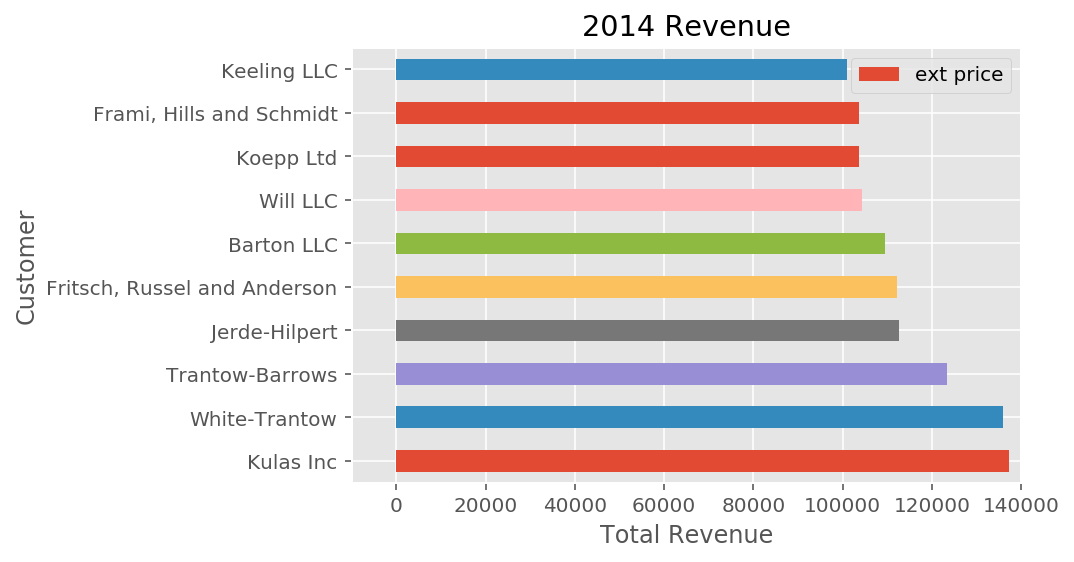

In [132]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="ext price", x="name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

In [141]:
def currency(x,pos):
    if x>1e+6:
        return('{:1.1f}M'.format(x*1e-6))
    return('{:1.0f}K'.format(x*1e-3))

In [142]:
currency(12311111,4)

'12.3M'

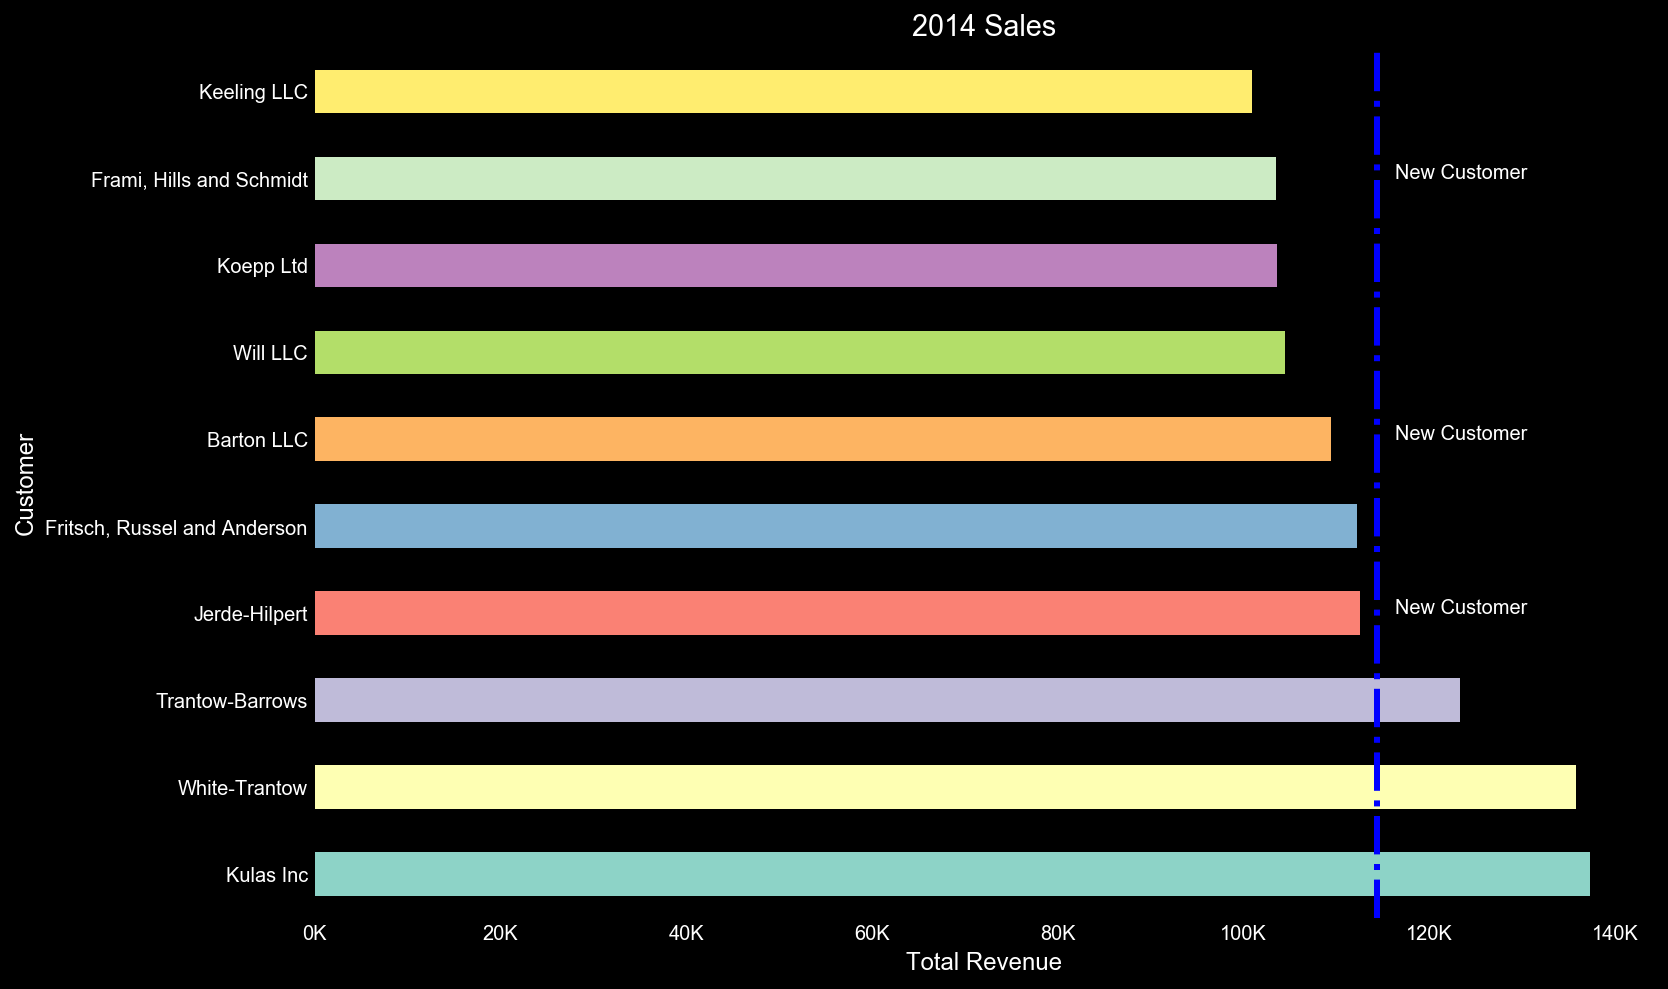

In [172]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize = (12,8))
top_10.plot(kind='barh',x = 'name',y = 'ext price',ax=ax)
ax.set(ylabel= 'Customer',xlabel='Total Revenue',title='2014 Sales')
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

avg = top_10['ext price'].mean()
ax.axvline(x = avg, c='b', linestyle = 'dashdot', linewidth = 3)

for cust in [3,5,8]:
    ax.text(x=avg+2000,y= cust,s='New Customer')


In [152]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics'}

In [175]:
def save_plot():
    answer = input('Do you want to save the plot? y/n: ')
    if answer == 'y':
        fig.savefig('my_plot',dpi=300, bbox_inches="tight")
    else:
        pass

save_plot()

Do you want to save the plot? y/n: n
